# Credit Card Fraud Detection

👉IMPORTING NECESSARY lIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

👉READING DATA

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


👉CHECKING MISSING VALUES

In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

👉SEPARATING TRUE AND FALSE TRANSACTIONS

In [6]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

(legit.shape, fraud.shape)

((284315, 31), (492, 31))

👉RANDOM UNDERSAMPLING OF TRUE TRANSACTIONS OF SIMILAR SIZE AS OF FRAUDULENT TRANSACTION

In [7]:
legit_sample = legit.sample(n = 492)
legit_sample.shape

(492, 31)

👉CREATING NEW DATAFRAME WIRH EQUAL NUMBER OF TRUE AND FRAUDULENT TRANSACTIONS

In [8]:
df = pd.concat([legit_sample, fraud], axis=0)
df.shape

(984, 31)

In [9]:
df.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

👉FEATURES AND TARGET SEPERATION

In [10]:
X = df.drop('Class', axis=1)
Y = df.Class

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

👉SEPERATING DATA FOR TRAINING AND TESTING

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2,)

In [13]:
(X.shape, X_train.shape, X_test.shape)

((984, 30), (787, 30), (197, 30))

👉USING LOGISTIC REGRESSION MODEL

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train, Y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MAKING PREDICTIONS ON TRAINING DATA

In [16]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9479034307496823


👉MAKING PREDICTIONS ON TESTING DATA

In [18]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [19]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


👉VISUALIZING TRAINING AND TESTING ACCURACIES

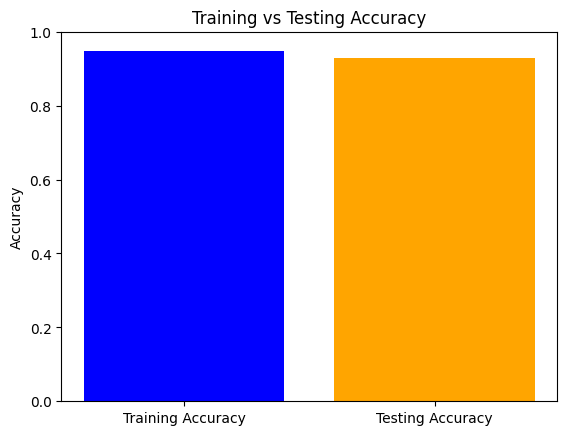

In [20]:
import matplotlib.pyplot as plt

# Create bar plot
accuracy_data = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels, accuracy_data, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()


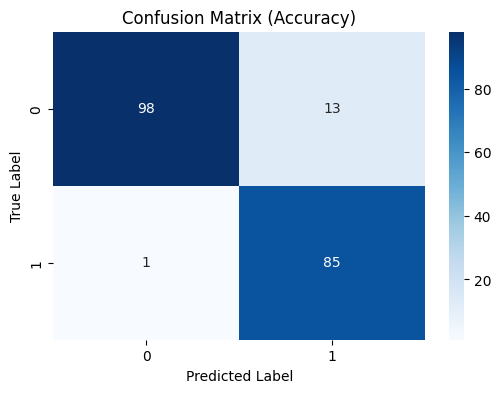

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_test_prediction, Y_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy)')
plt.show()

👉PRECISION SCORE

In [22]:
from sklearn.metrics import precision_score
precision = precision_score(X_test_prediction, Y_test)
print('Precision: ', precision)


Precision:  0.8673469387755102


👉RECALL SCORE

In [23]:
from sklearn.metrics import recall_score
recall = recall_score(X_test_prediction, Y_test)
print('Recall: ', recall)


Recall:  0.9883720930232558


👉F1 SCORE

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(X_test_prediction, Y_test)
print('F1-Score: ', f1)

F1-Score:  0.9239130434782609


👉 VISUALIZING PRECISION, RECALL, F1-SCORE

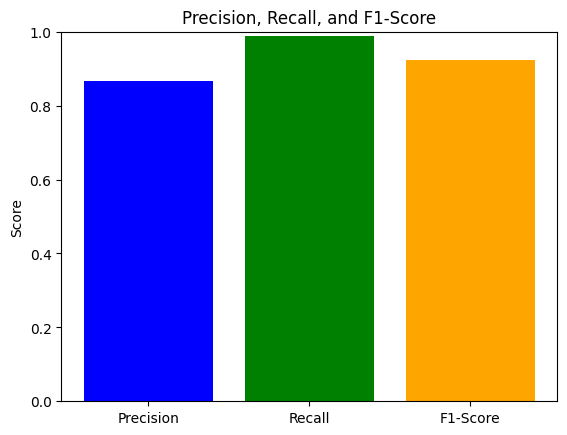

In [25]:
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

# Create bar plot
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Precision, recall, and F1 score are between 0 and 1
plt.title('Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.show()